In [1]:
import os
from keras import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from livelossplot.inputs.keras import PlotLossesCallback
from pathlib import Path
import pandas as pd
import numpy as n

2025-01-29 20:23:39.714193: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-29 20:23:39.805028: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-29 20:23:40.264612: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2025-01-29 20:23:40.264664: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinf

In [2]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers

    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """

    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=input_shape,
    classifier_activation="softmax",
)


    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [3]:
input_shape = (224, 224, 3)
class_subset = sorted(os.listdir('../../../data/imagens'))
n_classes= len(class_subset)
# Just Feature Extraction
model_ft = create_model(input_shape, n_classes)

2025-01-29 20:23:41.225457: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-29 20:23:41.248378: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-29 20:23:41.248536: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-29 20:23:41.248864: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

2025-01-29 20:23:43.263012: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8400


1/1 [==============================] - 2s 2s/step


2025-01-29 20:23:44.227657: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


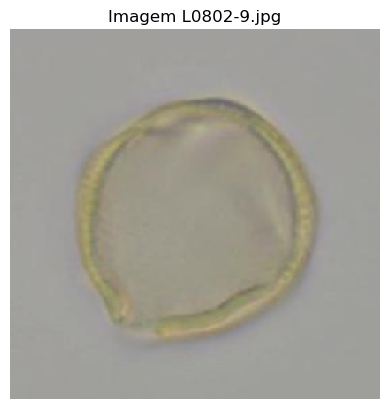

A imagem L0802-9.jpg pertence a classe: P-11
1/1 [==============================] - 0s 13ms/step


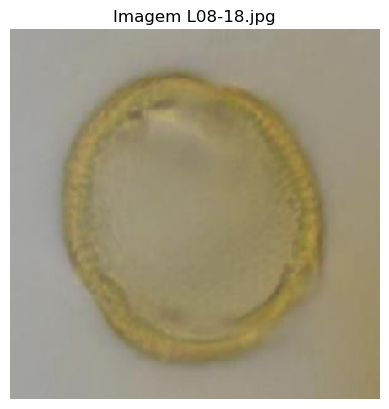

A imagem L08-18.jpg pertence a classe: P-1
1/1 [==============================] - 0s 12ms/step


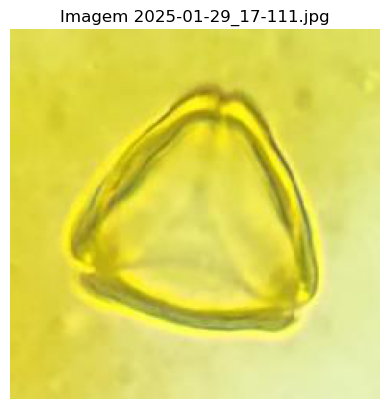

A imagem 2025-01-29_17-111.jpg pertence a classe: P-11
1/1 [==============================] - 0s 12ms/step


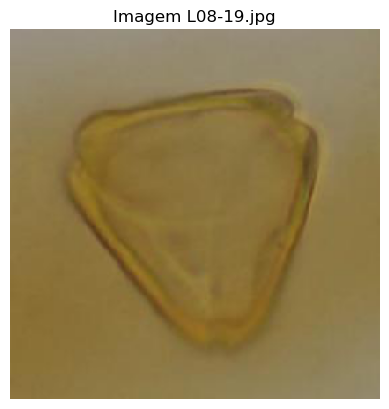

A imagem L08-19.jpg pertence a classe: P-11
1/1 [==============================] - 0s 12ms/step


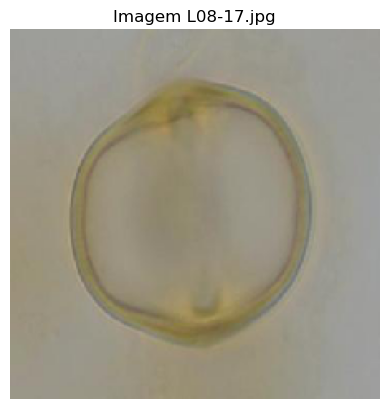

A imagem L08-17.jpg pertence a classe: P-11
1/1 [==============================] - 0s 12ms/step


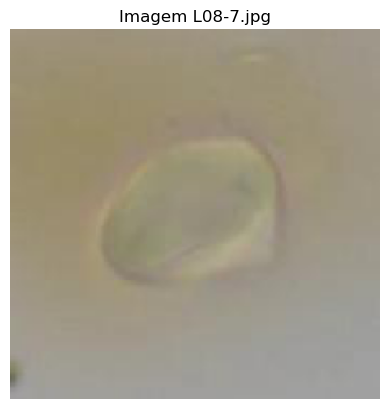

A imagem L08-7.jpg pertence a classe: P-11
1/1 [==============================] - 0s 12ms/step


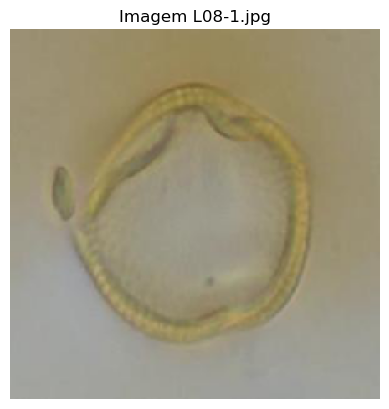

A imagem L08-1.jpg pertence a classe: P-1
1/1 [==============================] - 0s 12ms/step


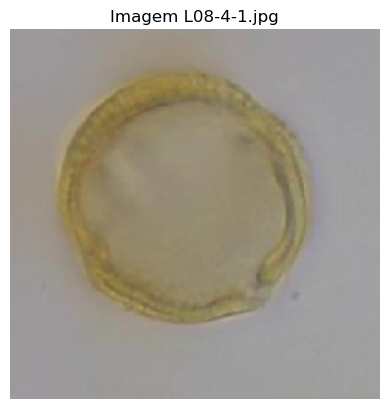

A imagem L08-4-1.jpg pertence a classe: P-1
1/1 [==============================] - 0s 14ms/step


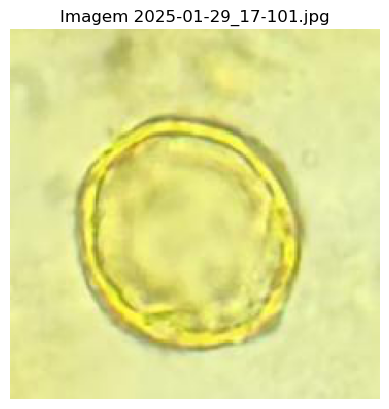

A imagem 2025-01-29_17-101.jpg pertence a classe: P-11
1/1 [==============================] - 0s 13ms/step


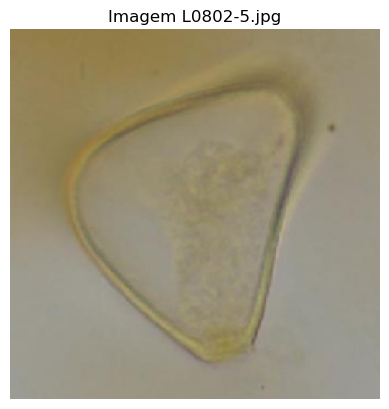

A imagem L0802-5.jpg pertence a classe: P-3
1/1 [==============================] - 0s 13ms/step


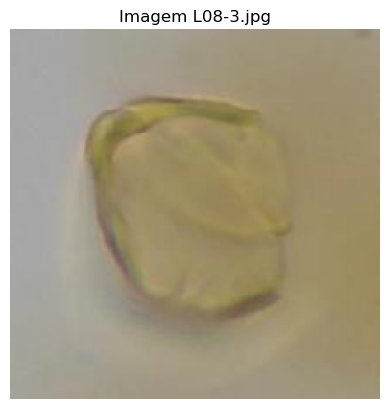

A imagem L08-3.jpg pertence a classe: P-11
1/1 [==============================] - 0s 13ms/step


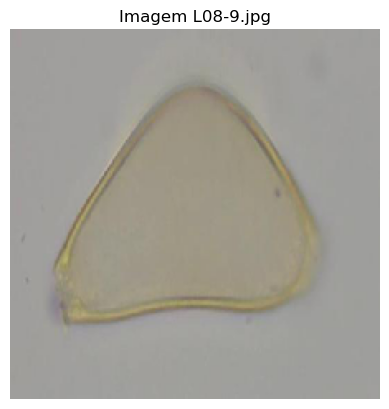

A imagem L08-9.jpg pertence a classe: P-11
1/1 [==============================] - 0s 13ms/step


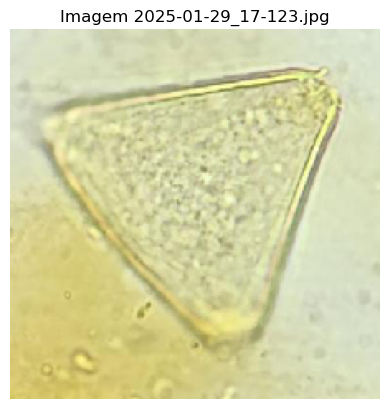

A imagem 2025-01-29_17-123.jpg pertence a classe: P-3
1/1 [==============================] - 0s 13ms/step


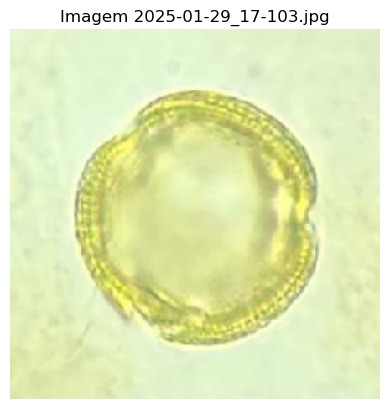

A imagem 2025-01-29_17-103.jpg pertence a classe: P-1
1/1 [==============================] - 0s 13ms/step


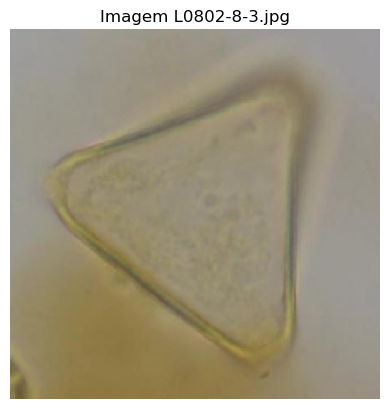

A imagem L0802-8-3.jpg pertence a classe: P-3
1/1 [==============================] - 0s 13ms/step


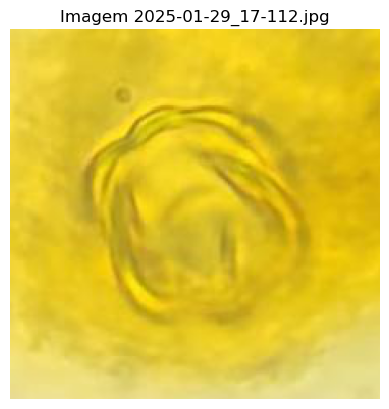

A imagem 2025-01-29_17-112.jpg pertence a classe: P-22
1/1 [==============================] - 0s 13ms/step


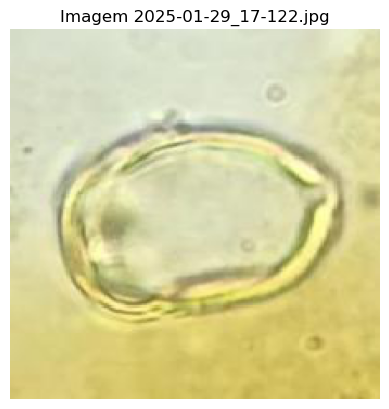

A imagem 2025-01-29_17-122.jpg pertence a classe: P-11
1/1 [==============================] - 0s 13ms/step


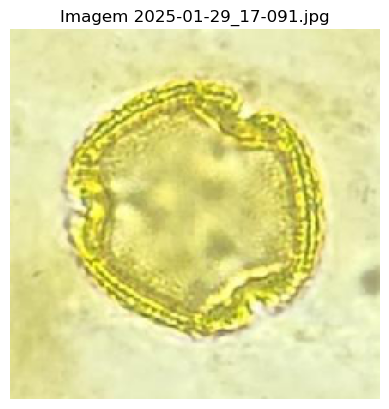

A imagem 2025-01-29_17-091.jpg pertence a classe: P-1
1/1 [==============================] - 0s 12ms/step


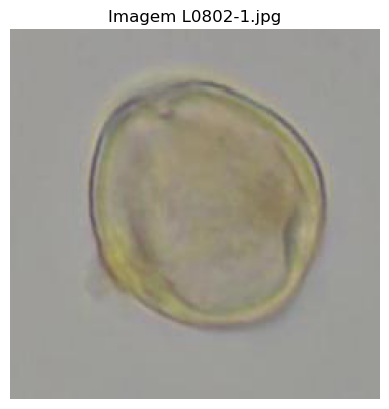

A imagem L0802-1.jpg pertence a classe: P-11
1/1 [==============================] - 0s 13ms/step


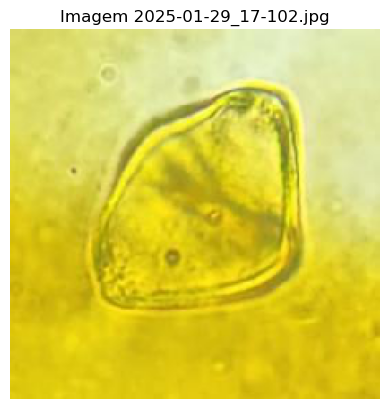

A imagem 2025-01-29_17-102.jpg pertence a classe: P-11
1/1 [==============================] - 0s 13ms/step


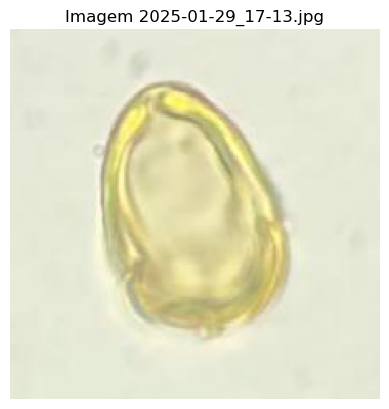

A imagem 2025-01-29_17-13.jpg pertence a classe: P-11
1/1 [==============================] - 0s 13ms/step


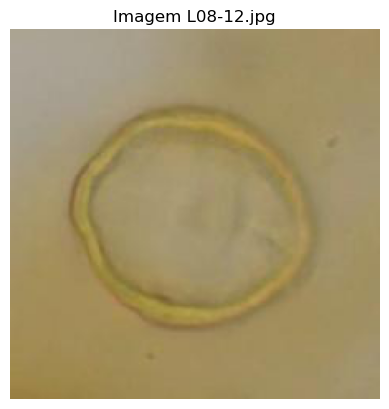

A imagem L08-12.jpg pertence a classe: P-11
1/1 [==============================] - 0s 14ms/step


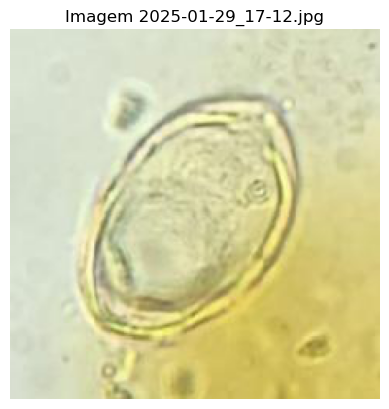

A imagem 2025-01-29_17-12.jpg pertence a classe: P-22
1/1 [==============================] - 0s 12ms/step


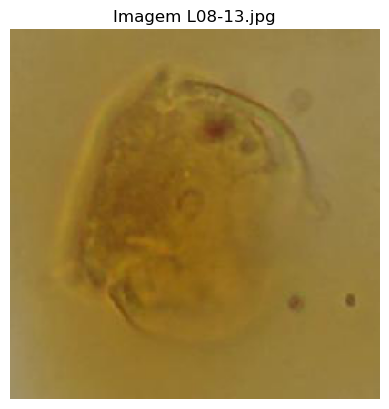

A imagem L08-13.jpg pertence a classe: P-1
1/1 [==============================] - 0s 12ms/step


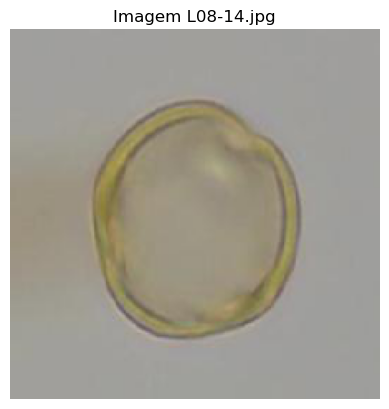

A imagem L08-14.jpg pertence a classe: P-11
1/1 [==============================] - 0s 12ms/step


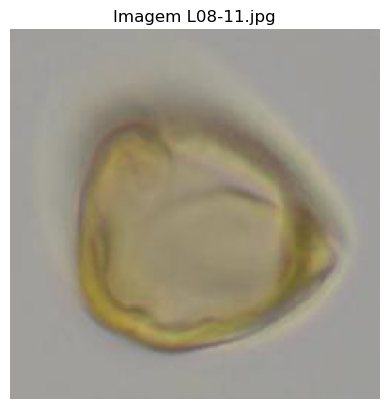

A imagem L08-11.jpg pertence a classe: P-11
1/1 [==============================] - 0s 12ms/step


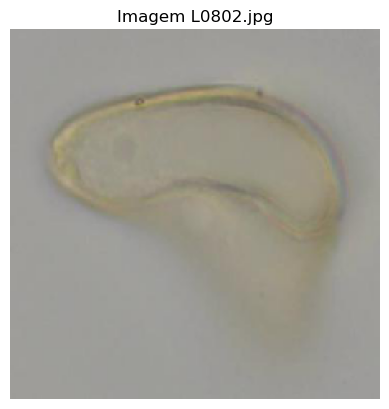

A imagem L0802.jpg pertence a classe: P-11
1/1 [==============================] - 0s 12ms/step


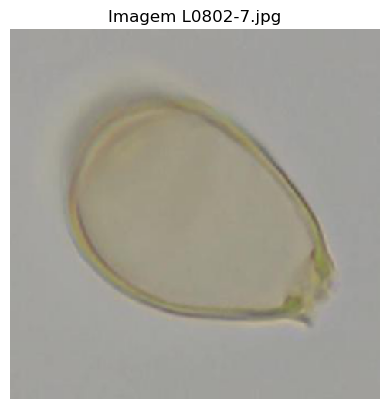

A imagem L0802-7.jpg pertence a classe: P-11
1/1 [==============================] - 0s 12ms/step


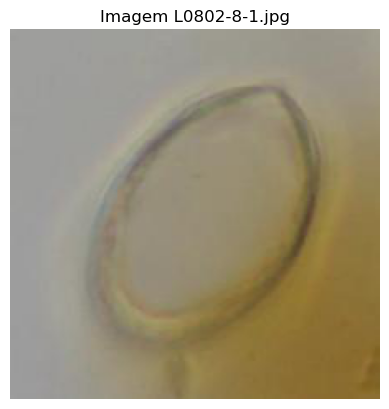

A imagem L0802-8-1.jpg pertence a classe: P-11
1/1 [==============================] - 0s 13ms/step


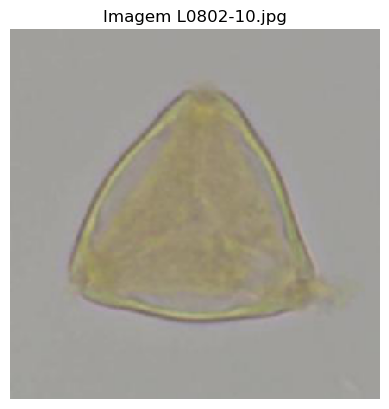

A imagem L0802-10.jpg pertence a classe: P-3
1/1 [==============================] - 0s 12ms/step


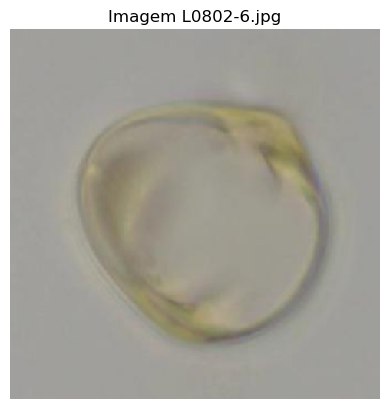

A imagem L0802-6.jpg pertence a classe: P-11
1/1 [==============================] - 0s 12ms/step


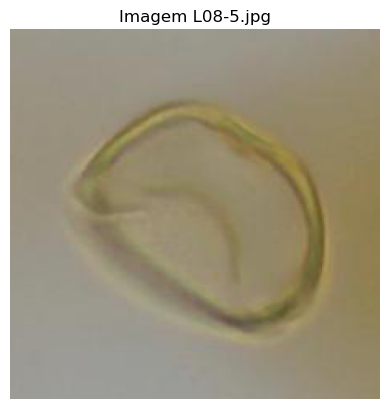

A imagem L08-5.jpg pertence a classe: P-11
1/1 [==============================] - 0s 12ms/step


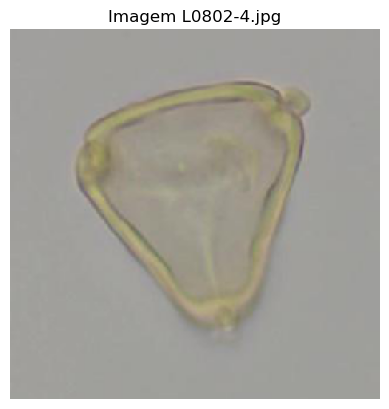

A imagem L0802-4.jpg pertence a classe: P-11
1/1 [==============================] - 0s 12ms/step


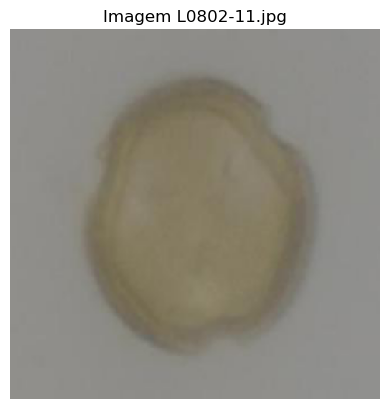

A imagem L0802-11.jpg pertence a classe: P-11
1/1 [==============================] - 0s 12ms/step


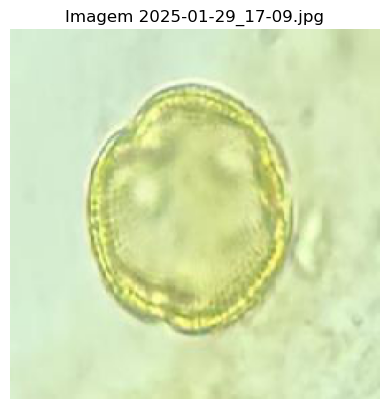

A imagem 2025-01-29_17-09.jpg pertence a classe: P-1
1/1 [==============================] - 0s 13ms/step


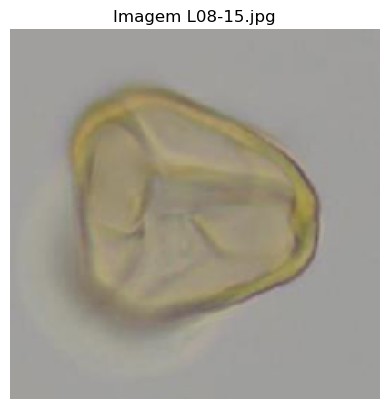

A imagem L08-15.jpg pertence a classe: P-11
1/1 [==============================] - 0s 12ms/step


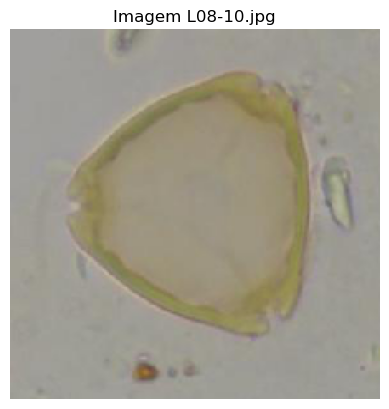

A imagem L08-10.jpg pertence a classe: P-11
1/1 [==============================] - 0s 12ms/step


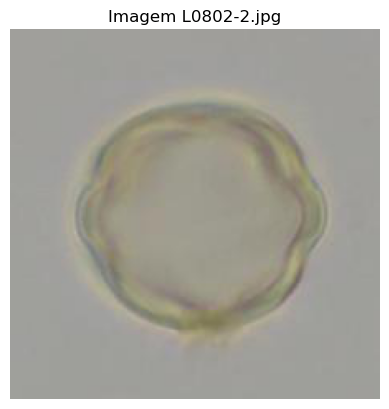

A imagem L0802-2.jpg pertence a classe: P-19
1/1 [==============================] - 0s 12ms/step


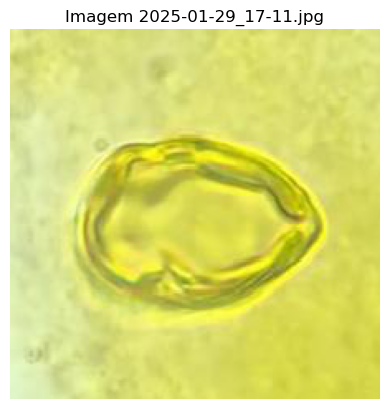

A imagem 2025-01-29_17-11.jpg pertence a classe: P-22
1/1 [==============================] - 0s 15ms/step


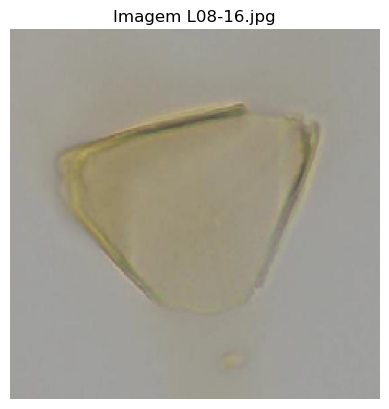

A imagem L08-16.jpg pertence a classe: P-11
1/1 [==============================] - 0s 13ms/step


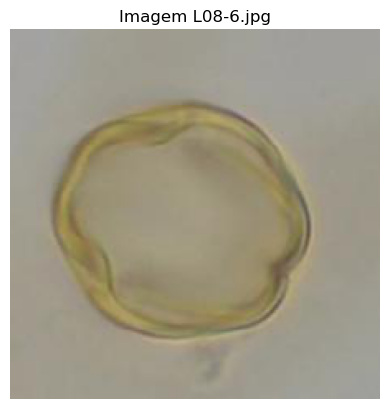

A imagem L08-6.jpg pertence a classe: P-11
1/1 [==============================] - 0s 13ms/step


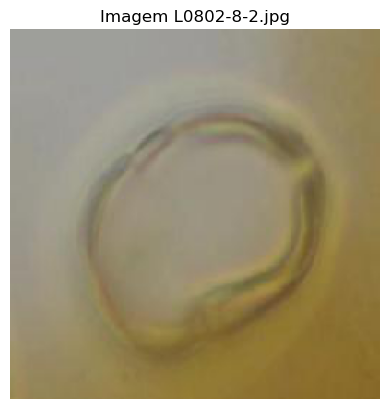

A imagem L0802-8-2.jpg pertence a classe: P-22
1/1 [==============================] - 0s 12ms/step


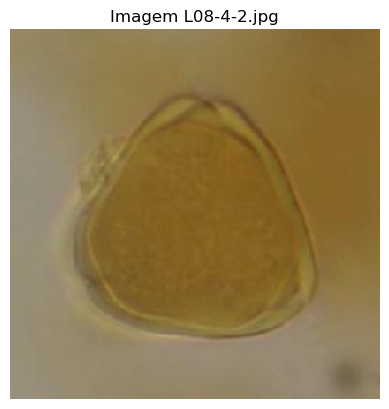

A imagem L08-4-2.jpg pertence a classe: P-11
1/1 [==============================] - 0s 12ms/step


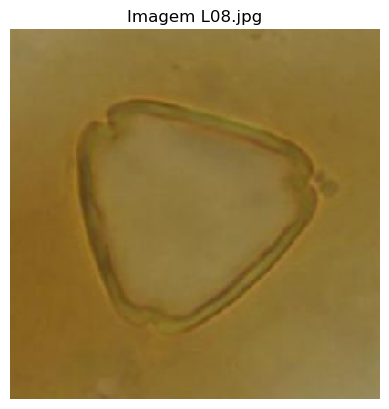

A imagem L08.jpg pertence a classe: P-1
1/1 [==============================] - 0s 13ms/step


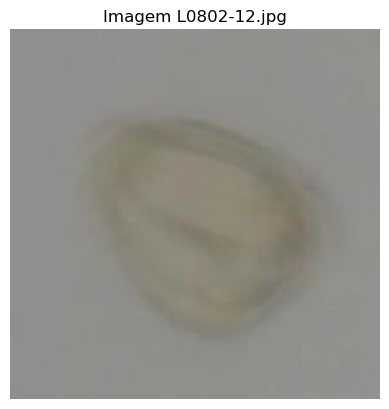

A imagem L0802-12.jpg pertence a classe: P-11
1/1 [==============================] - 0s 13ms/step


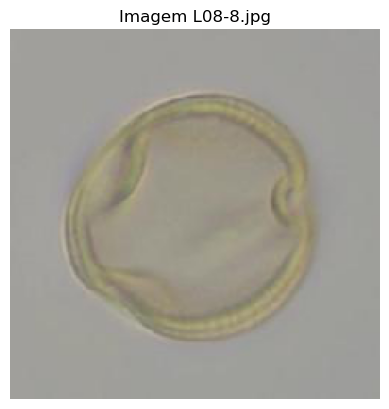

A imagem L08-8.jpg pertence a classe: P-11
1/1 [==============================] - 0s 13ms/step


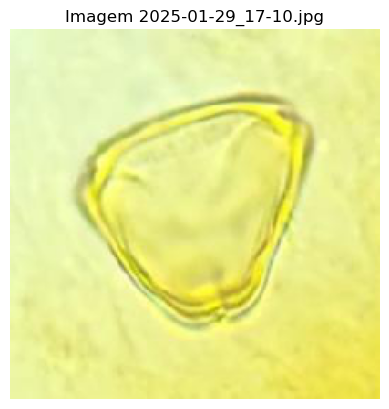

A imagem 2025-01-29_17-10.jpg pertence a classe: P-11
1/1 [==============================] - 0s 13ms/step


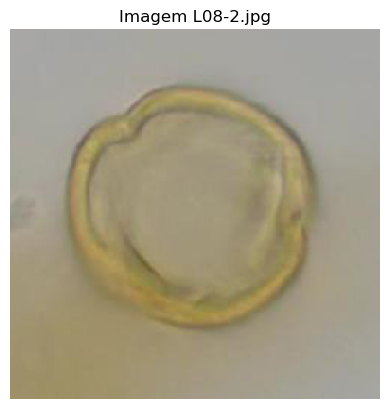

A imagem L08-2.jpg pertence a classe: P-11
1/1 [==============================] - 0s 13ms/step


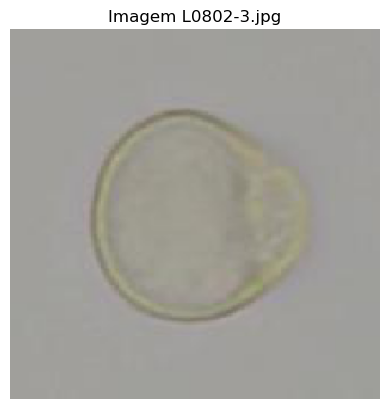

A imagem L0802-3.jpg pertence a classe: P-1


In [4]:

# Loading predictions from last article's model
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

basedir = "../../images"
# Generate predictions
filenames = os.listdir(basedir)

images = []
classes = []

model_ft.load_weights('../../../weights/full/VGG16/VGG16_v1.weights.best.keras') # initialize the best trained weights

for files in filenames:
    img = image.load_img(f'{basedir}/{files}', target_size=input_shape)
    img_array = image.img_to_array(img)
    
    img_array = n.expand_dims(img_array, axis=0) 



    preds_ft = model_ft.predict(img_array)
    
    pred_classes_ft = n.argmax(preds_ft, axis=1)
    
    
    plt.figure()  # Cria uma nova figura para cada imagem
    plt.imshow(img, cmap='gray')  # Exibe a imagem
    plt.title(f'Imagem {files}')  # Adiciona um título à imagem
    plt.axis('off')  # Desliga os eixos
    plt.show()  # Exibe a imagem
    print(f'A imagem {files} pertence a classe: {class_subset[pred_classes_ft[0]]}')
    images.append(files)
    classes.append(class_subset[pred_classes_ft[0]])

In [5]:
df = pd.DataFrame(data={"imagen": images, "classe": classes})
df

imagen classe
0             L0802-9.jpg   P-11
1              L08-18.jpg    P-1
2   2025-01-29_17-111.jpg   P-11
3              L08-19.jpg   P-11
4              L08-17.jpg   P-11
5               L08-7.jpg   P-11
6               L08-1.jpg    P-1
7             L08-4-1.jpg    P-1
8   2025-01-29_17-101.jpg   P-11
9             L0802-5.jpg    P-3
10              L08-3.jpg   P-11
11              L08-9.jpg   P-11
12  2025-01-29_17-123.jpg    P-3
13  2025-01-29_17-103.jpg    P-1
14          L0802-8-3.jpg    P-3
15  2025-01-29_17-112.jpg   P-22
16  2025-01-29_17-122.jpg   P-11
17  2025-01-29_17-091.jpg    P-1
18            L0802-1.jpg   P-11
19  2025-01-29_17-102.jpg   P-11
20   2025-01-29_17-13.jpg   P-11
21             L08-12.jpg   P-11
22   2025-01-29_17-12.jpg   P-22
23             L08-13.jpg    P-1
24             L08-14.jpg   P-11
25             L08-11.jpg   P-11
26              L0802.jpg   P-11
27            L0802-7.jpg   P-11
28          L0802-8-1.jpg   P-11
29           L0802-10.jpg    P-3
30            L0802-6.jpg   P-11
31              L08-5.jpg   P-11
32            L0802-4.jpg   P-11
33           L0802-11.jpg   P-11
34   2025-01-29_17-09.jpg    P-1
35             L08-15.jpg   P-11
36             L08-10.jpg   P-11
37            L0802-2.jpg   P-19
38   2025-01-29_17-11.jpg   P-22
39             L08-16.jpg   P-11
40              L08-6.jpg   P-11
41          L0802-8-2.jpg   P-22
42            L08-4-2.jpg   P-11
43                L08.jpg    P-1
44           L0802-12.jpg   P-11
45              L08-8.jpg   P-11
46   2025-01-29_17-10.jpg   P-11
47              L08-2.jpg   P-11
48            L0802-3.jpg    P-1